In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("../artifacts/raw/train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN34579,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,INN14268,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,INN00810,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,INN32373,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,INN12805,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'], inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(7695)

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(21325, 18)

In [17]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15194
Canceled         6131
Name: count, dtype: int64

In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [20]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15351
Room_Type 4     4406
Room_Type 6      760
Room_Type 2      480
Room_Type 5      192
Room_Type 7      132
Room_Type 3        4
Name: count, dtype: int64

In [22]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [26]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


#### UNIVARIATE ANALYSIS

In [38]:
def num_plot_dist(df, num_features):
    fig, axis = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axis = [axis]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axis[i][0], kde=True, palette="viridis")
        axis[i][0].set_title(f"Distribution of {column}")

        sns.boxplot(data=df, x=column, ax=axis[i][1], palette="viridis")
        axis[i][1].set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt

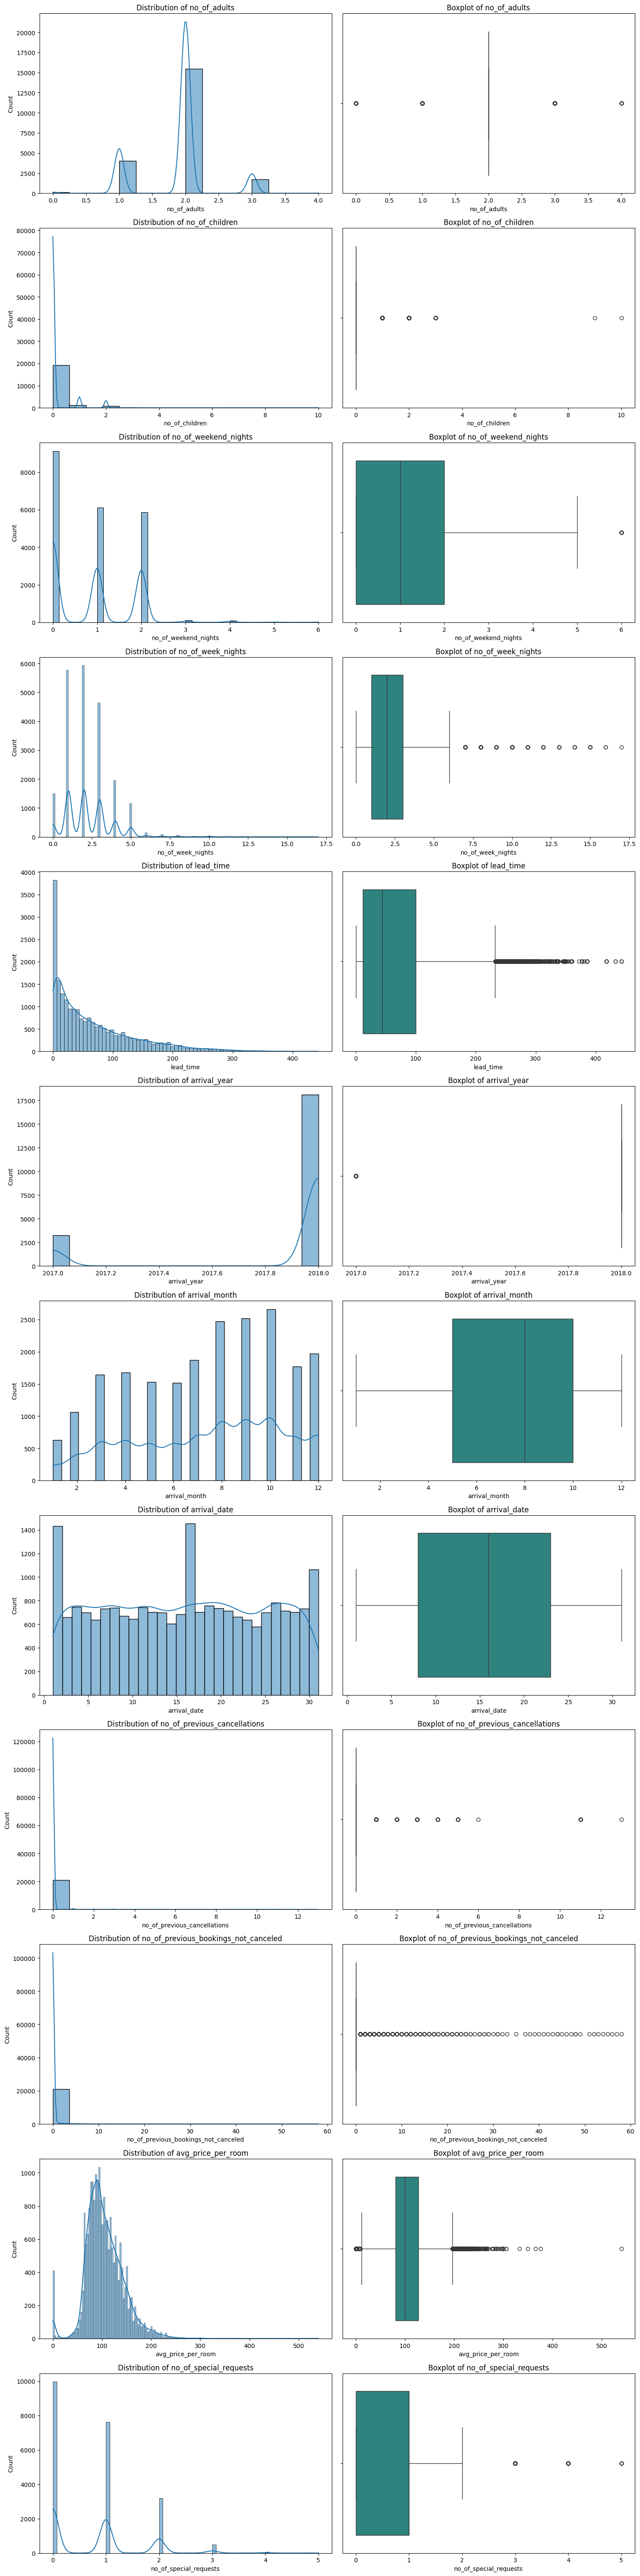

In [39]:
num_plot_dist(data, num_cols)